# DataMadness
## EDA (fancy plots)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 18
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [99]:
db = pd.read_csv('db_clean/titles.csv')

In [100]:
db = db[db['startYear'] < 2023]

In [101]:
db['sex'] = 'male'
db.loc[db['primaryProfession'].str.contains('actress'), 'sex'] = 'female'
db.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,replicas,regions,nconst,primaryName,birthYear,deathYear,primaryProfession,averageRating,numVotes,sex
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0126330,Josephine Byrnes,1966,2024,actress,6.4,86095,female
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0211306,Reed De Rouen,1921,1986,"actor,writer,miscellaneous",6.4,86095,male
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0235800,Cyril Dowler,1906,1986,actor,6.4,86095,male
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0360800,Geoff Hansen,1951,2015,"actor,cinematographer,director",6.4,86095,male
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0700947,Aly Purrott-Armstrong,1983,2024,actress,6.4,86095,female
5,tt0064994,movie,Larks on a String,Skrivánci na niti,0,1990,1990,94,"['Comedy', 'Drama', 'Romance']",27.0,"['FI', 'ES', 'XWW', 'BG', 'JP', 'PT', 'US', 'D...",nm0294143,Marinda French,1934,2024,actress,7.4,2036,female
6,tt0064994,movie,Larks on a String,Skrivánci na niti,0,1990,1990,94,"['Comedy', 'Drama', 'Romance']",27.0,"['FI', 'ES', 'XWW', 'BG', 'JP', 'PT', 'US', 'D...",nm0570570,Tim McInnerny,1956,2024,actor,7.4,2036,male
7,tt0064994,movie,Larks on a String,Skrivánci na niti,0,1990,1990,94,"['Comedy', 'Drama', 'Romance']",27.0,"['FI', 'ES', 'XWW', 'BG', 'JP', 'PT', 'US', 'D...",nm0578833,Stephen Mendel,1953,2024,"actor,soundtrack",7.4,2036,male
8,tt0064994,movie,Larks on a String,Skrivánci na niti,0,1990,1990,94,"['Comedy', 'Drama', 'Romance']",27.0,"['FI', 'ES', 'XWW', 'BG', 'JP', 'PT', 'US', 'D...",nm0707536,Jim Rakete,1951,2024,"actor,camera_department,director",7.4,2036,male
9,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,2018,122,['Drama'],22.0,"['AR', 'ES', 'GR', 'FR', 'KR', 'VE', 'CA', 'JP...",nm0467864,Jan Kotva,1943,1993,actor,6.7,7576,male


In [102]:
byYear = db.groupby('startYear').agg({
    'averageRating':'mean',
    'numVotes':'sum',
    'sex': lambda e: [sum(e == 'male'), sum(e =='female')]
})
byYear['males'] = byYear['sex'].apply(lambda e: e[0])
byYear['females'] = byYear['sex'].apply(lambda e: e[1])
byYear

,averageRating,numVotes,sex,males,females
startYear,,,,,
1980,6.812573,42534973,"[327, 190]",327,190
1981,6.694089,17457179,"[390, 236]",390,236
1982,6.910851,29352702,"[375, 224]",375,224
1983,6.680282,43068604,"[314, 183]",314,183
1984,6.790568,47446146,"[501, 273]",501,273
1985,6.577354,49019870,"[513, 273]",513,273
1986,6.571041,36566122,"[413, 250]",413,250
1987,6.642010,46393003,"[537, 289]",537,289
1988,6.722254,43524743,"[447, 263]",447,263


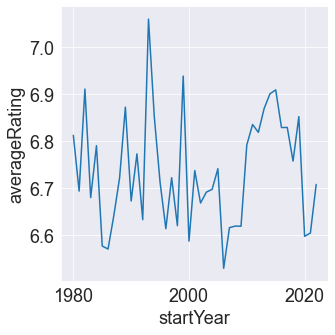

In [122]:
sns.relplot(x='startYear', y='averageRating', data=byYear, kind='line')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

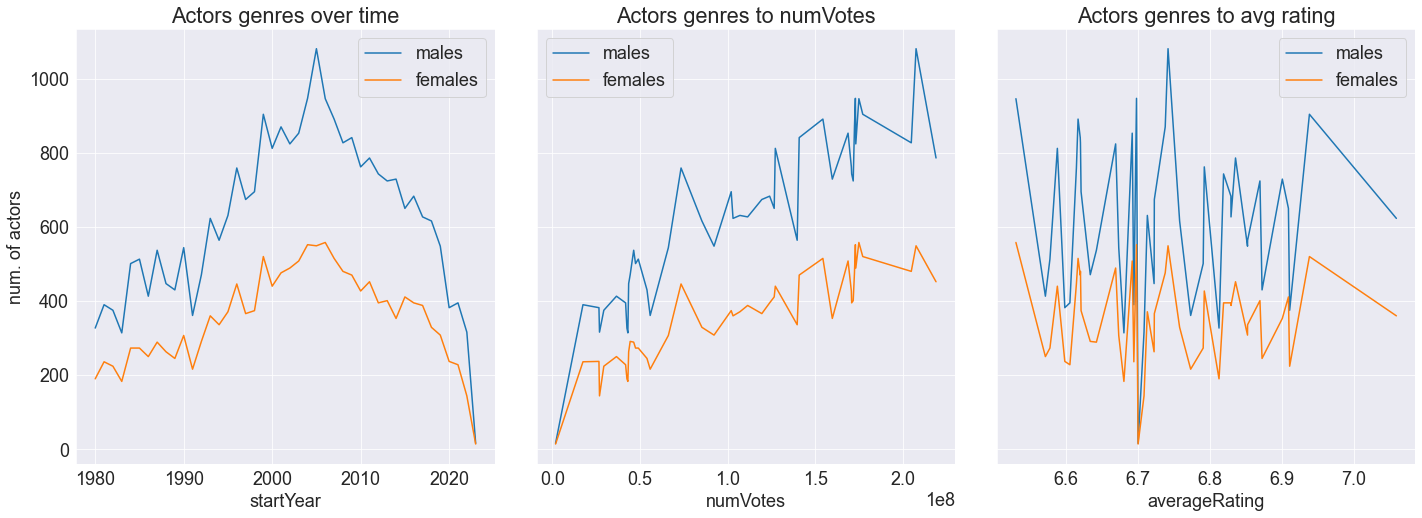

In [89]:
fig, axs = plt.subplots(ncols=3, sharey='row', figsize=(24,8))
sns.lineplot(x='startYear', y='males', data=byYear, ax=axs[0])
sns.lineplot(x='startYear', y='females', data=byYear, ax=axs[0])
axs[0].legend(['males','females'])
axs[0].set_ylabel('num. of actors')
axs[0].set_title('Actors genres over time')


sns.lineplot(x='numVotes', y='males', data=byYear, ax=axs[1])
sns.lineplot(x='numVotes', y='females', data=byYear, ax=axs[1])
axs[1].legend(['males','females'])
axs[1].set_ylabel('num. of actors')
axs[1].set_title('Actors genres to numVotes')

sns.lineplot(x='averageRating', y='males', data=byYear, ax=axs[2])
sns.lineplot(x='averageRating', y='females', data=byYear, ax=axs[2])
axs[2].legend(['males','females'])
axs[2].set_ylabel('num. of actors')
axs[2].set_title('Actors genres to avg rating')

plt.subplots_adjust(wspace=0.1)
plt.tight_layout

In [5]:
db.shape

(42874, 18)

<AxesSubplot:xlabel='averageRating', ylabel='sex'>

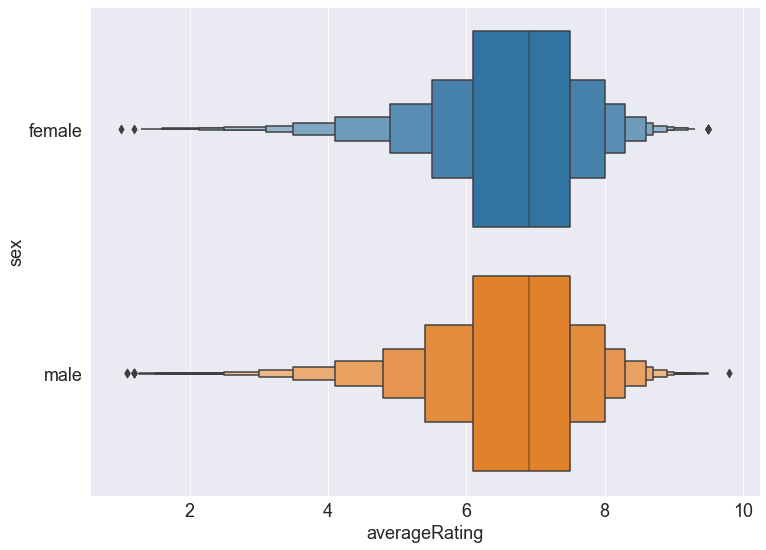

In [92]:
sns.boxenplot(data=db, x='averageRating', y='sex')

### Distribution of Average Rating variable
The variable we want to get insights on

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


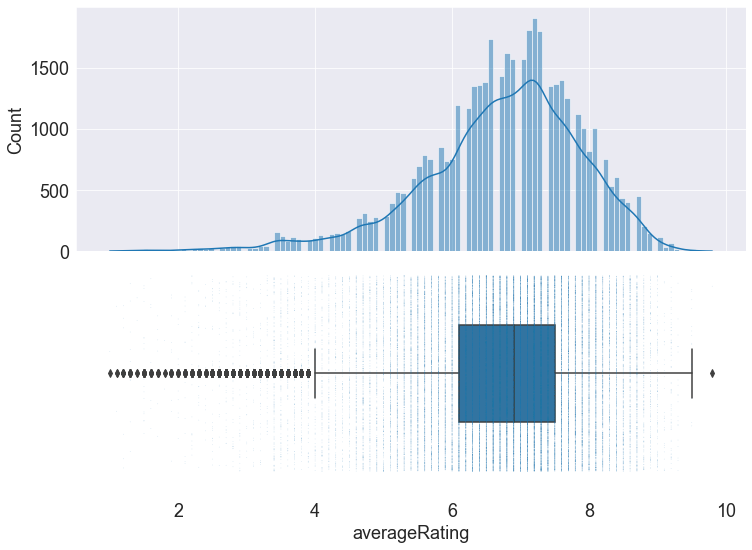

In [6]:
fig1, axs = plt.subplots(nrows=2)

sns.histplot(db['averageRating'], kde=True, ax=axs[0])
sns.stripplot(db['averageRating'], orient='h', jitter=0.4, size=.8, ax=axs[1], alpha=0.2)
sns.boxplot(db['averageRating'], orient='h', width=0.4, ax=axs[1], showfliers=True)

spacer = np.max(db['averageRating']) * 0.05
xmin = np.min(db['averageRating']) - spacer
xmax = np.max(db['averageRating']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

plt.subplots_adjust(hspace=0)
axs[1].set_facecolor('white')

#### Compare to Number of Votes

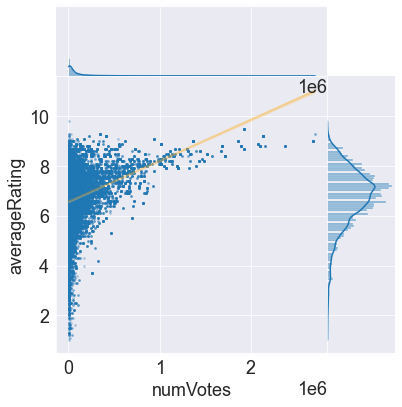

In [7]:
sns.jointplot(
    x='numVotes', y='averageRating', data=db, kind="reg", ratio=4, space=0,
    scatter_kws={'s': 3,'alpha': 0.25}, line_kws={'color': 'orange', 'alpha':0.3}
)

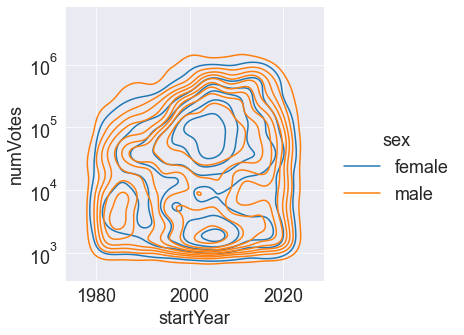

In [146]:
sns.displot(db, x='startYear', y='numVotes', hue='sex', kind='kde', log_scale=(False,True))

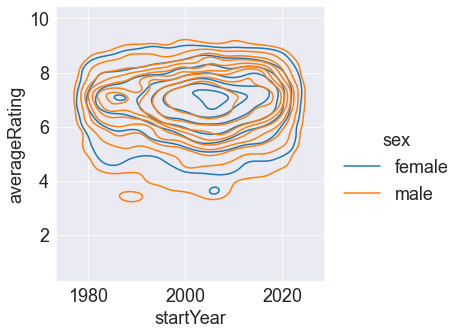

In [147]:
sns.displot(db, x='startYear', y='averageRating', hue='sex', kind='kde')

In [10]:
regions = db[['tconst', 'regions', 'averageRating', 'numVotes']].groupby('tconst').agg('first')
dictz = {
    '[':'',
    ']':'',
    '\'':''
}
for k,v in dictz.items():
    regions.regions = regions['regions'].str.replace(k, v)

regions.regions = regions['regions'].str.split(',')
regions = regions.explode('regions')
byRegion = regions.groupby('regions').agg(
    {'averageRating': 'mean', 'numVotes': 'sum'}
).reset_index().sort_values('numVotes', ascending=False)
byRegion.head(30)

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_20420\3841986968.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  regions.regions = regions['regions'].str.replace(k, v)


,regions,averageRating,numVotes
54,IN,6.811563,1737569539
19,CA,6.610967,1706135234
121,US,6.473988,1662521282
60,JP,6.630748,1270918502
45,GR,6.466367,1252221725
39,ES,6.533657,1045346428
32,DE,6.529739,935614334
40,FI,6.594338,929686701
16,BR,6.496914,927569214
42,GB,6.504840,914197409


In [12]:
len(byRegion.regions.unique())

243

votes come from 243 different regions

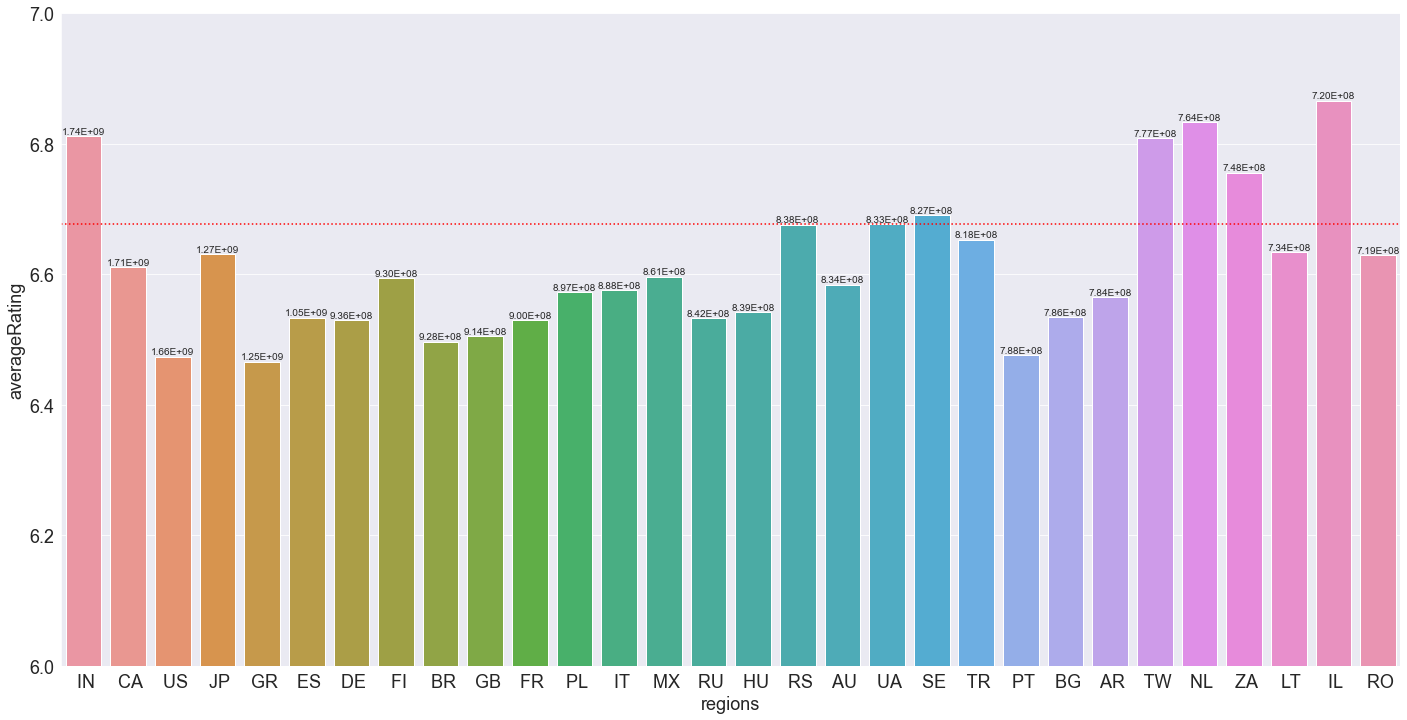

In [14]:
fig, ax = plt.subplots(figsize=(24, 12))
sns.barplot(x='regions', y='averageRating', data = byRegion.head(30), ax=ax)
ax.axhline(y=byRegion['averageRating'].median(), color='red', linestyle='dotted')
ax.set_ylim((6,7))

for i,patch in enumerate(ax.patches):
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    tick = ax.xaxis.get_majorticklabels()[i].get_text()
    votes = int(byRegion[byRegion['regions'] == tick].numVotes)
    ax.annotate(f'{votes:.2E}', (x.mean(), y), ha='center', va='bottom', size=10)


## Region
Display categorical region value together with the count of averageRating labels to determine which region has higher rate of vote in the db, then compare it to the average rating of the region itself.

### Correlation of numeric variables
This shows averageRating being correlated to numVotes which makes sense, and startYear to endYear (again understandable).
Small correlation also between runtimeMinutes and averageRating: *investigate*

<AxesSubplot:>

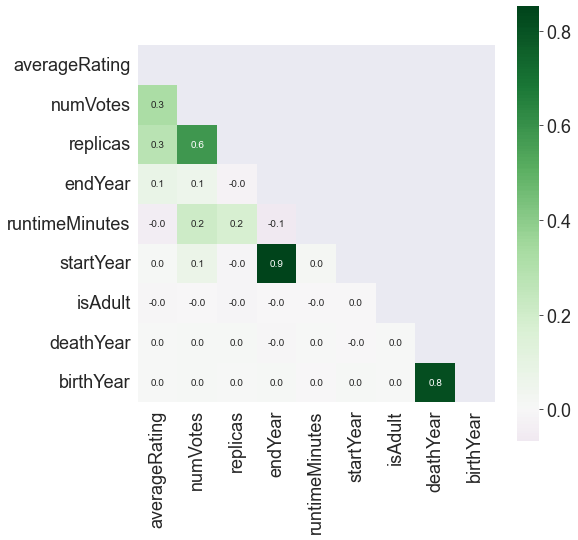

In [15]:
dset = db
s = dset.corr().loc[:, 'averageRating'].abs().sort_values(ascending=False)
s = dset.loc[:, list(s.index)].corr()
mask = np.zeros_like(s)
mask[np.triu_indices_from(mask)] = 1
plt.figure(figsize=(8, 8))
sns.heatmap(s, mask=mask, square=True, cmap='PRGn', center=0, robust=True, annot=True, annot_kws={"size":10}, fmt='.1f')

### pairplot for numerical variables

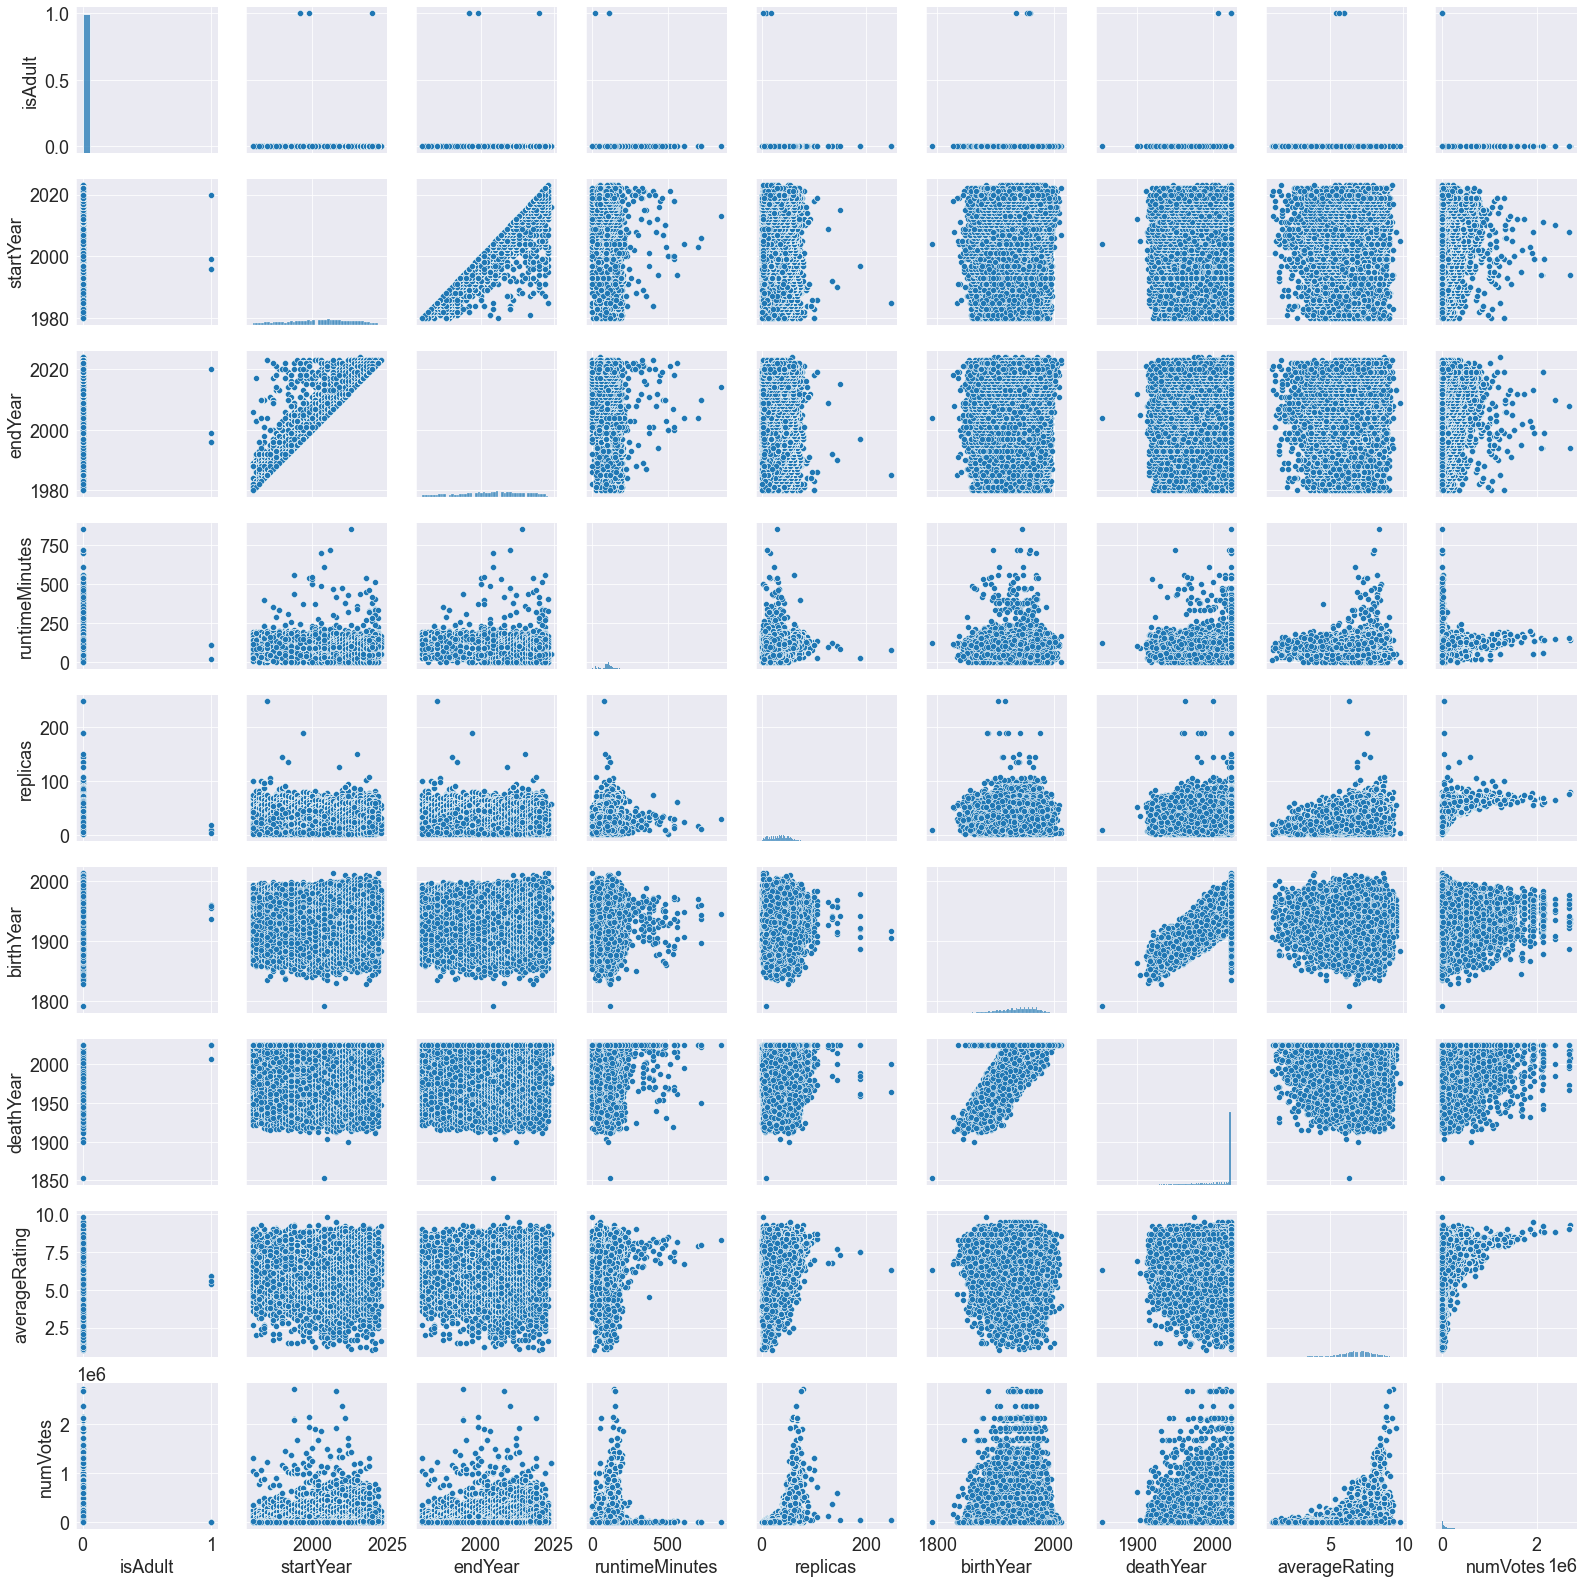

In [16]:
numeric = db.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
sns.pairplot(numeric)

### Most recurrent titles
series with high number of episodes, or movies with many replicas

In [129]:
aggregator = {'replicas':'max','averageRating':'mean', 'numVotes':'sum', 'startYear':'first'}
byReplicas = db.groupby('primaryTitle').agg(aggregator).sort_values('replicas', ascending = False)
byReplicas.head(25)

,replicas,averageRating,numVotes,startYear
primaryTitle,,,,
The Black Cauldron,247.0,6.300000,75342,1985
Pokémon,189.0,7.500000,310107,1997
Shaun the Sheep Movie,149.0,7.300000,41588,2015
Home Alone,144.0,7.700000,3591072,1990
Home Alone 2: Lost in New York,134.0,6.800000,1855460,1992
A Christmas Carol,126.0,7.342857,306167,1984
Demon Slayer: Kimetsu no Yaiba,106.0,8.700000,218462,2019
Aliens,105.0,8.400000,6521517,1986
Ralph Breaks the Internet,101.0,7.000000,663592,2018


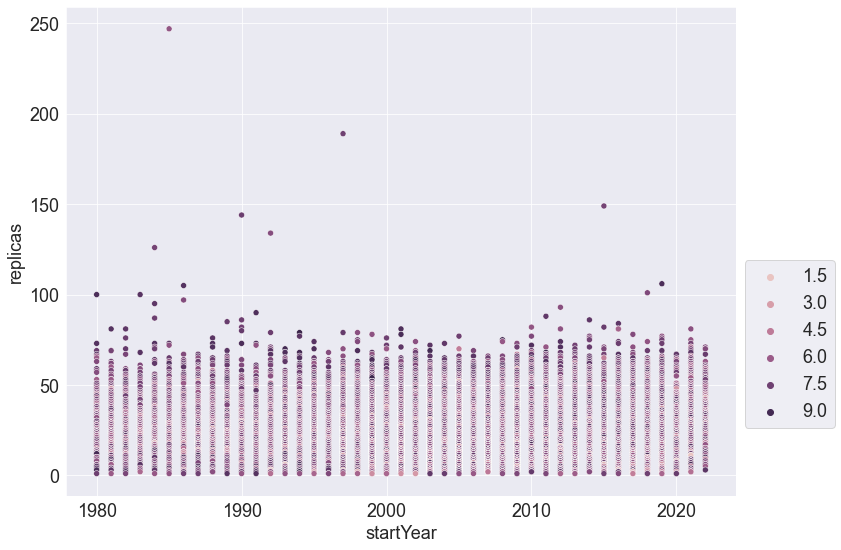

In [149]:
sns.cubehelix_palette(n_colors=6, light=0.5)
sns.scatterplot(x='startYear', y='replicas', hue='averageRating', data=byReplicas)
plt.legend(bbox_to_anchor=(1,0.5))

### Top-rated titles
titles where averageRating is the highest

In [28]:
aggregator = {'tconst':'first', 'startYear':'first','averageRating':'mean','numVotes':'sum'}
bestMovies = db.groupby('primaryTitle').agg(aggregator).reset_index().sort_values('averageRating', ascending=False)
bestMovies.head(20)

,primaryTitle,tconst,startYear,averageRating,numVotes
2587,Choufli Hal,tt7151672,2005,9.8,2589
2101,Breaking Bad,tt0903747,2008,9.5,28940595
12770,The Joy of Painting,tt0383795,1983,9.3,5614
14090,The Wire,tt0306414,2002,9.3,4843342
9357,Pretenders,tt0316613,2002,9.3,10054
13675,The Shawshank Redemption,tt0111161,1994,9.3,5412706
12892,The Last of Us,tt3581920,2023,9.2,1125220
8831,Otvorena vrata,tt0191714,1994,9.2,8130
4716,Game of Thrones,tt0944947,2011,9.2,57507678
13733,The Sopranos,tt0141842,1999,9.2,13571976


### Top-rated actors
based on movie ratings

In [40]:
top_actors = db.groupby(['tconst']).aggregate({
    'primaryName':lambda e: ', '.join(e.unique()),
    'primaryTitle':lambda e: ', '.join(e.unique()),
    'startYear': 'min',
    'averageRating':'max',
    'numVotes':'max'
})

In [41]:
top_actors.sort_values('averageRating',ascending=False).head(20)

,primaryName,primaryTitle,startYear,averageRating,numVotes
tconst,,,,,
tt7151672,William Austin,Choufli Hal,2005,9.8,2589
tt0903747,"Catarina Abdalla, Juli Cantó, Igor Cavalera, M...",Breaking Bad,2008,9.5,1929373
tt9471404,Wanda Luczycka,The Chosen,2017,9.3,33291
tt0306414,"Hans Abich, Alex Barad, Philip L. Boddy, Elio,...",The Wire,2002,9.3,345953
tt0383795,Barry Sobel,The Joy of Painting,1983,9.3,5614
tt0111161,"Burt Reynolds, Mary Langan",The Shawshank Redemption,1994,9.3,2706353
tt0316613,"Emil Bruun, Tat-Ming Cheung",Pretenders,2002,9.3,5027
tt0191714,"Maks Furijan, Terry Rangno",Otvorena vrata,1994,9.2,4065
tt0141842,"Roy Alan Wilson, Lynne Allen, Fran Anthony, Vl...",The Sopranos,1999,9.2,411272


In [42]:
top_actors.sort_values('numVotes' , ascending=False).head(20)

,primaryName,primaryTitle,startYear,averageRating,numVotes
tconst,,,,,
tt0111161,"Burt Reynolds, Mary Langan",The Shawshank Redemption,1994,9.3,2706353
tt0468569,"Sela Ward, Robert Carradine, Troy Donahue, Ton...",The Dark Knight,2008,9.0,2679814
tt1375666,"Timothy Hutton, Laura Gemser, Don Buchsbaum, T...",Inception,2010,8.8,2377823
tt0137523,"Brian Robbins, Liz Torres, Tânia Gomide, Edgar...",Fight Club,1999,8.8,2150874
tt0944947,"Ben Chaplin, Wilda Bieber, Mikhail Bolduman, A...",Game of Thrones,2011,9.2,2129914
tt0109830,"Colm Meaney, Kerim Afsar, Luis Alcoriza, Kurti...",Forrest Gump,1994,8.8,2102744
tt0110912,"George Peppard, Victoria Principal, Barbara Ba...",Pulp Fiction,1994,8.9,2077780
tt0133093,"Ian Abercrombie, Persis Khambatta, Patrick Mul...",The Matrix,1999,8.7,1931124
tt0903747,"Catarina Abdalla, Juli Cantó, Igor Cavalera, M...",Breaking Bad,2008,9.5,1929373
